# <center>LANGUAGE DISTRIBUTION</center>
***
## <font color = blue>I. LANGUAGE DISTRIBUTION</font>
> A. LIBRARIES<br>
> B. POLYGLOT LANGUAGE DETECTION<br>
> C. FASTEXT LANGUAGE DETECTION<br>
> D. COMPARISON BETWEEN POLYGLOT AND FASTTEXT<br>
> E. LANGUAGE VISUALIZATION<br>

## <font color = blue>II. SAVING THE DATAFRAME FOR THE NEXT STEPS</font>
***
##### Additional information before to get started :
* The target of this notebook is to detect the language of the text.
* We used two libraries for that: polyglot and fasttext.
* After a comparison, we decided to use fasttext for our project.
***

## <font color = blue>I. LANGUAGE DISTRIBUTION</font>
> A. LIBRARIES<br>

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from polyglot.detect import Detector
from polyglot.detect.base import logger as polyglot_logger
polyglot_logger.setLevel("ERROR")

import fasttext

In [34]:
df = pd.read_csv('../data/data_with_text.csv')


> B. POLYGLOT LANGUAGE DETECTION<br>

In [35]:
def get_language_code_polyglot(text):
    try:
        lang = Detector(text.lower()).language
        if (lang.confidence > 40):
            return lang.code
        else:
            return 'unknown'
    except:
        return 'unknown'
    
def get_language_conf_polyglot(text):
    try:
        lang = Detector(text.lower()).language
        return lang.confidence
    except:
        return 0



> C. FASTEXT LANGUAGE DETECTION<br>

In [36]:
fasttext.FastText.eprint = lambda x: None
fmodel = fasttext.load_model('data/lid.176.bin')
def get_language_code_fasttext(text):
    try:
        return fmodel.predict(text.lower())[0][0].split("__label__")[1]
    except Exception as e:
        return 'unknown'

def get_language_conf_fasttext(text):
    try:
        return fmodel.predict(text.lower())[1][0]
    except Exception as e:
        return 0



> D. COMPARISON BETWEEN POLYGLOT AND FASTTEXT<br>

In [37]:
pd.set_option('display.max_colwidth', -1)
df_compare = df.copy()
df_compare['lang_code_p'] = df_compare['text'].apply(get_language_code_polyglot)
df_compare['lang_code_f'] = df_compare['text'].apply(get_language_code_fasttext)

df_diff = df_compare[df_compare['lang_code_p']!=df_compare['lang_code_f']]


df_diff[['lang_code_p','lang_code_f','text']].head(100)

C:\Users\dell\AppData\Local\Temp\ipykernel_10308\4028015265.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,lang_code_p,lang_code_f,text
25,unknown,fr,- - Moage - M - - - - - RPg FACTURE Logo Nom DATE Date - NDELAFACIURE VOTHEBOCIETE A Codep posial. Vile Telephone Vecopie Adressec de poumer Numéro FACTUREHA Aue Code postal Ville Telephene Telecopie Acesedes courier VENDEUR POSTE CONDITIONS DE PAIEMENT DATEDECHEANCE Alaricegtion QUANTITE DESCRIPTION PHIX UNITAIRE TOTALDELALIGNE Phal Puna a Pa Chmayaha Cymaph 0ynapwa CK-mapha MsimE MnitmE Mmnt MtmE MmE MmC Msent MmC Soustssal VVA Tosai -
28,unknown,fr,"FACTURE SAUCISSES SA N:123 81-85 Cours Albert Thomas, 69003 Lyon, France reléphone: 33 123456789 Fax.+33 123456789 Email: esasidssésilse www. saucisses.com DETAILLE DE FACTURE: Date de facture Sujet Montant Totale FACTURA A: NOMBRE DIRECCION TELÉFONO CORREO ELECTRONICO 22 de abril de 2019 Jambons et saucisses 800E Jorge Santos Calle Canteros 68, Huelva, Esparla +34123-456789 orgesamipsegmal.com NO TIPO DE. ARTICULO 01 Jambons et saucisses DESCRIPCION Jambons 00% Espagnole QTY PRECIO I 325E 3 220€ IMPORTE 325€ 660E 02. Jambons et saucisses premium Jambans et saucisses premium 7Kg 03 04 05 06 07 SOUS-TOTAL TVA (20%) REMISE (10%) MONTANT TOTALE 1.072,66 985E 206,85E 119,185 METHODE DE PAIEMENT NOMBRE DEL BANCO SUJET NOM CONDITIONS GENERALES Auamentiunt undit accus et aut magnis a solorum autas digento con rematum sed estinum hil to tenit as roct maio blat laccarit temquam voloribus aut magins a maio hil Ret Everum Bank 1710042019 Debora Consedus solorum. Merci pour votre service."
31,unknown,fr,"Pierre, 62 37659 Saint remy Telephone: +33653.026507 Email: eanpeme@supefacicom www. superfact.com Jean Pierre Facture 08 de mai de 2019 I No.1301 FACTURER. A.: Nom Adresse Telephone Email PAYMENT ECHU. 08 de juin de 201 NUMERO DE DEMANDE 08 de mai de 201 TOTALE $660.2 NO TYPE D'ARTICLE 01 Nom du servicelarticle 02 Nom du servicelarticle 03 Nom du servicelarticle 04 Nom du servicelarticle 05 Nom du servicelarticle 06 Nom du servicelarticle 07 Nom du servicelarticle DESCRIPTION Description d'articlel service ici Description d'articlel service ici Description d'article! service ici Description d'article! service ici Description d'articlel service ick Description d'articlel service ici Description d'article! service ici QNT PRIX 1 90€ 3 53€ 2 32€ 2 57€ 1 60€ 5 90€ 1 90€ P.T 90€ 159€ 64€ 114€ 60€ 450€ 90€ Méthode de payment Nom du Banque Numero de compe Titulaire du compte Terms et conditions FACTURE TOTALE SUBTOTAL TVA (21%) REDUCTION (10%) 21€ TOTALE 1000€ 210€ 1200€ Auamentiunt undit accus et aut magnis a solorum autas digento con rematum sed estnum hil mo tenit as reet maio blat lacearit temquam volorbus aut magins a maio hil solorum."
44,en,fr,FACTIRE E DoIT
45,en,fr,"Facture d'avoir numero Date e at ragtune ECnCE d at atu Nunero de clicri Mamert c Modulne de ment Fmal à Cortact client Dur ce la patn Dtinatalres Isfermationa ompimmtaires, factane fvor m mhonae: de la tuctune jagan nno d racanr ponnenale Dkescriptias uantile tiaiiy Frh niraine A% VA TOTAL. - Mun faat Matinel heeres poces DOE ue a 24006 204 naoe nuoe Total HT TVA Total TTC suoot 00oE so0D0€ Man de atne arese ewk N SIRET ma: Caandanial patca"
...,...,...,...
256,en,fr,"Guse CANADA CANADA Passport Passeport The Minister ofForeign Ler ministre des Affaires Affairs ofCanada requests, étrangères duCanada, au int the name of Herl Majesty nom de Sal Majesté lal Reine, the Queen, allthosewhom prie les autorités intèressées itmay concerni to allow deb bien vouloir laisser passer the bearer to pass freely, let titulairel librement, sans without delay orh hindrance, délaic ou entrave, der même andt toa afford the bearer such que lui préterl'aideetla la assistanceand; protection protectiondontilaurait Ispaspotisthepoperty Cepasepotestèpopite atheGoenmentofCmada dugouemementdiCmada mustnotbealtered You Iinedoits tsubiraucune mustaererypreaution altération. Vousdevezen tosafeguardit. pendelepusgandsain Tispasponmaybeused Cepasseportnep peutètre onys/thebearerinw whose utilise queparsontitulire. 

**We'll use the fasttext library**

In [39]:
df['lang_code'] = df['text'].apply(get_language_code_fasttext)
df['lang_conf'] = df['text'].apply(get_language_conf_fasttext)

> E. LANGUAGE VISUALIZATION<br>

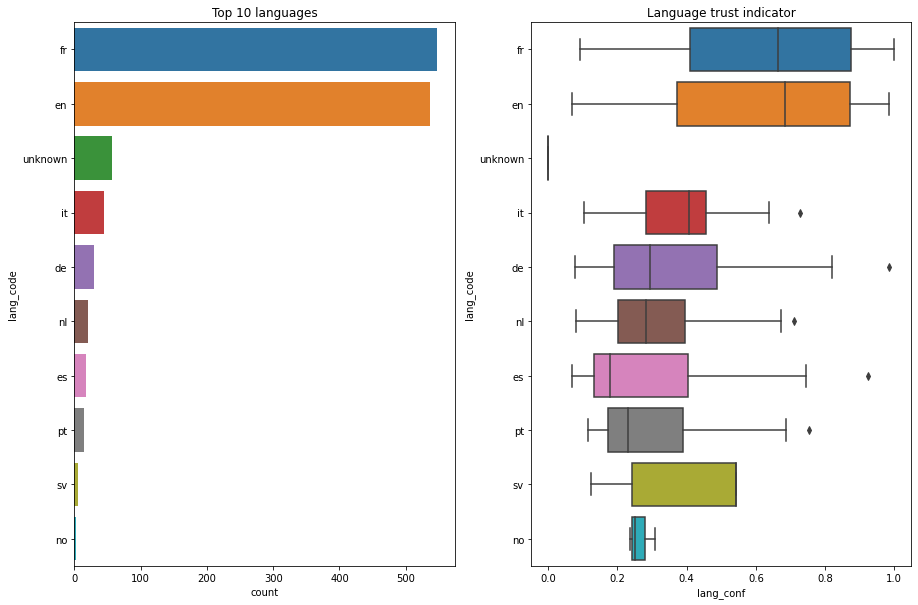

In [40]:
fig = plt.figure(figsize=(15,10))
plt.subplot(121)
sns.countplot(y='lang_code',data=df,order=df.lang_code.value_counts().iloc[:10].index).set(title='Top 10 languages')

plt.subplot(122)
sns.boxplot(x = 'lang_conf', y = 'lang_code', data = df, order = df.lang_code.value_counts().iloc[:10].index)
plt.title(label = 'Language trust indicator')
plt.show()

## <font color = blue>II. SAVING THE DATAFRAME FOR THE NEXT STEPS</font>

In [41]:
df.to_csv('../data/data_with_text_langue.csv')